In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score
import seaborn as sns

In [ ]:
print(dir(tf.keras.applications))

['ConvNeXtBase', 'ConvNeXtLarge', 'ConvNeXtSmall', 'ConvNeXtTiny', 'ConvNeXtXLarge', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7', 'EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3', 'EfficientNetV2L', 'EfficientNetV2M', 'EfficientNetV2S', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'VGG16', 'VGG19', 'Xception', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'convnext', 'densenet', 'efficientnet', 'efficientnet_v2', 'imagenet_utils', 'inception_resnet_v2', 'inception_v3', 'mobilenet', 'mobilenet_v2', 'mobilenet_v3', 'nasnet', 'resnet', 'resnet50', 'resnet_v2', 'vgg16', 'vgg19', 

In [ ]:
print(dir(tf.keras.applications.mobilenet_v3))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'decode_predictions', 'preprocess_input']


In [ ]:
train_dir = '/content/drive/MyDrive/Virus/train'
val_dir = '/content/drive/MyDrive/Virus/validation'
test_dir = '/content/drive/MyDrive/Virus/test'

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,zoom_range=0.2,shear_range=0.2,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,zoom_range=0.2,shear_range=0.2,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)

In [ ]:
train_ds = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,class_mode='categorical', shuffle=True)
val_ds = val_gen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,class_mode='categorical', shuffle=True)
test_ds = test_gen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True)

Found 745 images belonging to 22 classes.
Found 248 images belonging to 22 classes.
Found 252 images belonging to 22 classes.


In [ ]:
mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
mobilenet.trainable = True

In [ ]:
for layer in mobilenet.layers[:-30]:
    layer.trainable = False

In [ ]:
model = Sequential([mobilenet,GlobalAveragePooling2D(),Dropout(0.5),Dense(128, activation='relu'),Dropout(0.3),Dense(train_ds.num_classes, activation='softmax')])

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy', AUC(name='auc')])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs=30,callbacks=[early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0632 - auc: 0.5630 - loss: 3.3396 - val_accuracy: 0.1048 - val_auc: 0.7057 - val_loss: 3.1127
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2146 - auc: 0.7499 - loss: 2.7106 - val_accuracy: 0.1452 - val_auc: 0.7744 - val_loss: 2.7155
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2820 - auc: 0.7879 - loss: 2.4945 - val_accuracy: 0.2016 - val_auc: 0.7985 - val_loss: 2.5605
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3578 - auc: 0.8464 - loss: 2.2012 - val_accuracy: 0.2500 - val_auc: 0.8285 - val_loss: 2.4038
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3588 - auc: 0.8590 - loss: 2.0968 - val_accuracy: 0.2903 - val_auc: 0.8449 - val_loss: 2.2796
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3963 - auc: 0.8763 - loss: 2.0058 - val_accuracy: 0.3226 - val_auc: 0.8438 - val_loss: 2.2483
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - 

In [ ]:
def plot_history(history, model_name):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Val')
  plt.title(f'{model_name} Loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Train')
  plt.plot(history.history['val_accuracy'], label='Val')
  plt.title(f'{model_name} Accuracy')
  plt.legend()
  plt.show()
  history = model.fit(train_ds, validation_data=val_ds, epochs=10)
  plot_history(history, "model")

In [ ]:
def evaluate_model(model, name):
  y_pred = model.predict(test_ds)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_true = test_ds.classes
  print(f"{name} Classification Report")
  print(classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES))
  cm = confusion_matrix(y_true, y_pred_classes)
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"{name} Confusion Matrix")
  plt.show()
  auc = roc_auc_score(tf.keras.utils.to_categorical(y_true, NUM_CLASSES), y_pred, multi_class='ovr')
  precision = precision_score(y_true, y_pred_classes, average='weighted')
  recall = recall_score(y_true, y_pred_classes, average='weighted')
  print(f"AUC: {auc:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")

In [ ]:
NUM_CLASSES = train_ds.num_classes
print(f"Number of classes: {NUM_CLASSES}")

Number of classes: 22


In [ ]:
CLASS_NAMES = list(test_ds.class_indices.keys())
print(f"Class names: {CLASS_NAMES}")

Class names: ['Adenovirus', 'Astrovirus', 'CCHF', 'Cowpox', 'Dengue', 'Ebola', 'Guanarito', 'Influenza', 'LCM', 'Lassa', 'Machupo', 'Marburg', 'Nipah virus', 'Norovirus', 'Orf', 'Papilloma', 'Pseudocowpox', 'Rift Valley', 'Rotavirus', 'Sapovirus', 'TBE', 'WestNile']


In [ ]:
#evaluate_model(model, "MobileNetV2")

In [ ]:
#MobileNetV2
mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
mobilenet.trainable = False
model = Sequential([mobilenet,GlobalAveragePooling2D(),Dropout(0.3),Dense(NUM_CLASSES, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stop])



Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1298 - loss: 3.2190 - val_accuracy: 0.2419 - val_loss: 2.3501
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2570 - loss: 2.3795 - val_accuracy: 0.3105 - val_loss: 2.0914
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3699 - loss: 1.9826 - val_accuracy: 0.3468 - val_loss: 2.0336
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4200 - loss: 1.7641 - val_accuracy: 0.3831 - val_loss: 1.9099
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4041 - loss: 1.8015 - val_accuracy: 0.4073 - val_loss: 1.8334
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4999 - loss: 1.6131 - val_accuracy: 0.3952 - val_loss: 1.8245
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4476 - loss: 1.7385 - val_accuracy: 0.4113 - val_loss: 1.7686
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4900 - loss: 1.5857 - val_accuracy: 0.3992 - val_loss:

In [ ]:
#UNet
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

def unet_model(input_size=(128, 128, 3)):
  inputs = Input(input_size)
  conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
  conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
  conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
  conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
  up1 = UpSampling2D(size=(2, 2))(conv3)
  merge1 = Concatenate()([conv2, up1])
  conv4 = Conv2D(128, 3, activation='relu', padding='same')(merge1)
  conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
  up2 = UpSampling2D(size=(2, 2))(conv4)
  merge2 = Concatenate()([conv1, up2])
  conv5 = Conv2D(64, 3, activation='relu', padding='same')(merge2)
  conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)
  outputs = Conv2D(1, 1, activation='sigmoid')(conv5)
  model = Model(inputs=inputs, outputs=outputs)
  return model

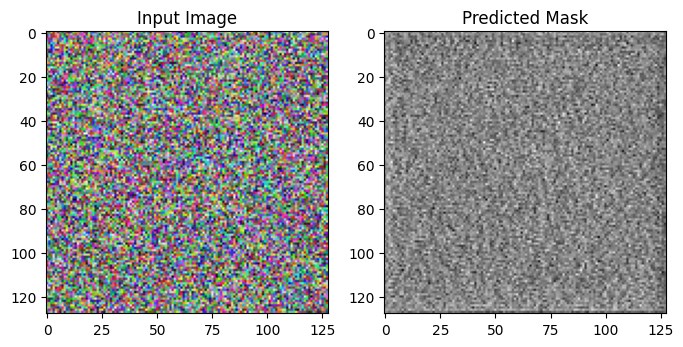

In [ ]:
unet = unet_model()
sample_img = tf.random.uniform((1, 128, 128, 3))
pred_mask = unet(sample_img)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(sample_img))
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(pred_mask), cmap='gray')
plt.title("Predicted Mask")
plt.show()

In [ ]:
def predict_image(img_path, model):
  img = load_img(img_path, target_size=(224, 224))
  img_array = img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  pred = model.predict(img_array)
  label = CLASS_NAMES[np.argmax(pred)]
  conf = np.max(pred)
  plt.imshow(img)
  plt.title(f"Predicted: {label} ({conf*100:.2f}%)")
  plt.axis('off')
  plt.show()

In [ ]:
#evaluate_model(model_resnet, "ResNet50")
#plot_history(history_resnet, "ResNet50")

In [ ]:
#ResNet50
from tensorflow.keras.applications import ResNet50
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet.trainable = False
model_resnet = Sequential([resnet,GlobalAveragePooling2D(),Dropout(0.4),Dense(NUM_CLASSES, activation='softmax')])
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet = model_resnet.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stop])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.0658 - loss: 3.4576 - val_accuracy: 0.0968 - val_loss: 2.9197
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - accuracy: 0.0847 - loss: 3.1341 - val_accuracy: 0.1452 - val_loss: 2.8347
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - accuracy: 0.0966 - loss: 3.0030 - val_accuracy: 0.1452 - val_loss: 2.8044
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - accuracy: 0.1416 - loss: 2.8422 - val_accuracy: 0.1089 - val_loss: 2.7678
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - accuracy: 0.1439 - loss: 2.8653 - val_accuracy: 0.0968 - val_loss: 2.7575
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.1267 - loss: 2.8286 - val_accuracy: 0.1653 - val_loss: 2.7371
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.1518 - loss: 2.8211 - val_accuracy: 0.1492 - val_loss: 2.7211
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accurac

In [ ]:
#LSTM
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Reshape, LSTM
cnn = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224,224,3))
cnn.trainable = False
model_lstm = Sequential([cnn,Reshape((49, 1280)),LSTM(64),Dropout(0.3),Dense(NUM_CLASSES, activation='softmax')])
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stop])

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.0630 - loss: 3.1164 - val_accuracy: 0.1048 - val_loss: 2.9549
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1043 - loss: 3.0233 - val_accuracy: 0.1048 - val_loss: 2.9388
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0789 - loss: 3.0147 - val_accuracy: 0.1048 - val_loss: 2.9319
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0898 - loss: 2.9806 - val_accuracy: 0.1048 - val_loss: 2.9292
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0790 - loss: 2.9936 - val_accuracy: 0.1048 - val_loss: 2.9275
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0927 - loss: 2.9440 - val_accuracy: 0.1048 - val_loss: 2.9253
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.0886 - loss: 2.9718 - val_accuracy: 0.1048 - val_loss: 2.9258
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.0781 - loss: 2.9733 - val_accuracy: 0.1048 - val_loss:

In [ ]:
#UNet
def unet_model(input_size=(128, 128, 3)):
  inputs = Input(input_size)
  conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
  conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
  conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
  conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
  up1 = UpSampling2D(size=(2, 2))(conv3)
  merge1 = Concatenate()([conv2, up1])
  conv4 = Conv2D(128, 3, activation='relu', padding='same')(merge1)
  conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
  up2 = UpSampling2D(size=(2, 2))(conv4)
  merge2 = Concatenate()([conv1, up2])
  conv5 = Conv2D(64, 3, activation='relu', padding='same')(merge2)
  conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)
  outputs = Conv2D(1, 1, activation='sigmoid')(conv5)
  model = Model(inputs=inputs, outputs=outputs)
  return model
unet = unet_model()
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5014 - loss: 0.6968 - val_accuracy: 0.5031 - val_loss: 0.7186
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.4986 - loss: 0.7203 - val_accuracy: 0.5031 - val_loss: 0.6936
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4987 - loss: 0.6938 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.4962 - val_loss: 0.6935
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.4973 - val_loss: 0.6935


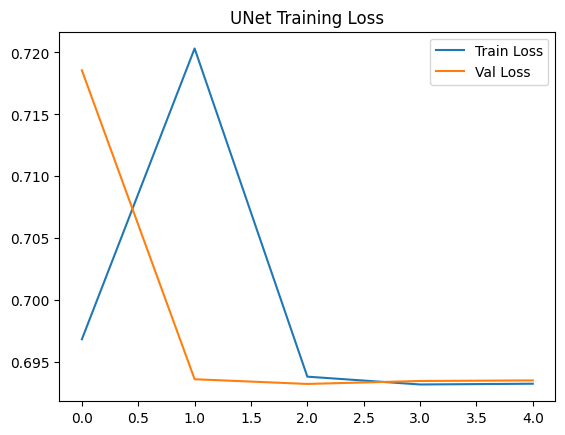

In [ ]:
X_dummy = tf.random.normal((16, 128, 128, 3))
y_dummy = tf.random.uniform((16, 128, 128, 1), minval=0, maxval=2, dtype=tf.int32)
y_dummy = tf.cast(y_dummy, tf.float32)
history_unet = unet.fit(X_dummy, y_dummy, validation_split=0.2, epochs=5)
plt.plot(history_unet.history['loss'], label='Train Loss')
plt.plot(history_unet.history['val_loss'], label='Val Loss')
plt.title("UNet Training Loss")
plt.legend()
plt.show()

In [ ]:
def predict_image(img_path, model):
  img = load_img(img_path, target_size=(224, 224))
  img_array = img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  pred = model.predict(img_array)
  label = CLASS_NAMES[np.argmax(pred)]
  conf = np.max(pred)
  plt.imshow(img)
  plt.title(f"Predicted: {label} ({conf*100:.2f}%)")
  plt.axis('off')
  plt.show()